In [7]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn import tree
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
files = os.listdir('3e_SFS_sims')

In [10]:
files

['SFS_T_1125677.946_L_297623.745_A_122691.796_B_264109.604_M_349728.128_nloc_80204_loc_len179.csv',
 'SFS_T_222444.198_L_444543.846_A_296089.077_B_135154.567_M_157860.305_nloc_81228_loc_len212.csv',
 'SFS_T_532634.212_L_1088541.801_A_324645.813_B_289687.74_M_294131.059_nloc_48149_loc_len231.csv',
 'SFS_T_166367.224_L_347341.563_A_353636.935_B_226613.349_M_151742.216_nloc_74407_loc_len172.csv',
 'SFS_T_16316.947_L_527428.167_A_492611.077_B_329887.464_M_62530.558_nloc_43432_loc_len134.csv',
 'SFS_T_431581.147_L_16595.703_A_91594.825_B_22985.767_M_155113.495_nloc_80905_loc_len103.csv',
 'SFS_T_364484.964_L_49335.051_A_205269.395_B_15451.853_M_137823.713_nloc_79402_loc_len180.csv',
 'SFS_T_4227.108_L_565541.213_A_330176.594_B_256771.851_M_63828.93_nloc_54083_loc_len248.csv',
 'SFS_T_1539445.723_L_159334.889_A_460615.665_B_62081.993_M_469544.758_nloc_33124_loc_len141.csv',
 'SFS_T_442205.768_L_172310.734_A_417214.882_B_57018.15_M_200568.946_nloc_83472_loc_len113.csv',
 'SFS_T_2961.625_L_494

In [16]:
lil_test = [file.replace('len', 'len_') for file in files]

In [17]:
lil_test

['SFS_T_1125677.946_L_297623.745_A_122691.796_B_264109.604_M_349728.128_nloc_80204_loc_len_179.csv',
 'SFS_T_222444.198_L_444543.846_A_296089.077_B_135154.567_M_157860.305_nloc_81228_loc_len_212.csv',
 'SFS_T_532634.212_L_1088541.801_A_324645.813_B_289687.74_M_294131.059_nloc_48149_loc_len_231.csv',
 'SFS_T_166367.224_L_347341.563_A_353636.935_B_226613.349_M_151742.216_nloc_74407_loc_len_172.csv',
 'SFS_T_16316.947_L_527428.167_A_492611.077_B_329887.464_M_62530.558_nloc_43432_loc_len_134.csv',
 'SFS_T_431581.147_L_16595.703_A_91594.825_B_22985.767_M_155113.495_nloc_80905_loc_len_103.csv',
 'SFS_T_364484.964_L_49335.051_A_205269.395_B_15451.853_M_137823.713_nloc_79402_loc_len_180.csv',
 'SFS_T_4227.108_L_565541.213_A_330176.594_B_256771.851_M_63828.93_nloc_54083_loc_len_248.csv',
 'SFS_T_1539445.723_L_159334.889_A_460615.665_B_62081.993_M_469544.758_nloc_33124_loc_len_141.csv',
 'SFS_T_442205.768_L_172310.734_A_417214.882_B_57018.15_M_200568.946_nloc_83472_loc_len_113.csv',
 'SFS_T_2961

In [83]:
y_df = pd.DataFrame(columns=['mod_mid_change','mid_length','ancestral_size','mid_size','modern_size','num_loci','loci_len'])

In [84]:
y_df

,mod_mid_change,mid_length,ancestral_size,mid_size,modern_size,num_loci,loci_len


In [19]:
all_splits = [file.split('_') for file in lil_test]

In [39]:
ind_dict = {'mod_mid_change':2,'mid_length':4,'ancestral_size':6,'mid_size':8,'modern_size':10,'num_loci':12,'loci_len':15}

In [95]:
for keys,values in ind_dict.items():
    l = [line[values] for line in all_splits]
    if values == 15:
        l = [el.split('.')[0] for el in l]
    y_df[keys] = l
    y_df[keys] = y_df[keys].astype(float)

In [82]:
files2 = ['/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS_sims/'+ ring for ring in files]
files2

['/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS_sims/SFS_T_1125677.946_L_297623.745_A_122691.796_B_264109.604_M_349728.128_nloc_80204_loc_len179.csv',
 '/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS_sims/SFS_T_222444.198_L_444543.846_A_296089.077_B_135154.567_M_157860.305_nloc_81228_loc_len212.csv',
 '/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS_sims/SFS_T_532634.212_L_1088541.801_A_324645.813_B_289687.74_M_294131.059_nloc_48149_loc_len231.csv',
 '/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS_sims/SFS_T_166367.224_L_347341.563_A_353636.935_B_226613.349_M_151742.216_nloc_74407_loc_len172.csv',
 '/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS_sims/SFS_T_16316.947_L_527428.167_A_492611.077_B_329887.464_M_62530.558_nloc_43432_loc_len134.csv',
 '/Users/aaronw/Desktop/Dissertation/Chapter_5_Diascia/Clean_model_scripts/3e_SFS

In [86]:
x_dat = []
for f in files2: x_dat.append(pd.read_csv(f)['SFS'])

In [97]:
x_df = pd.DataFrame(x_dat)
x_df[40] = y_df['num_loci'].values
x_df[39] = y_df['loci_len'].values
x_df[40] = x_df[40]/60000
x_df[39] = x_df[39]/250

In [98]:
y_dat = y_df[['mod_mid_change','mid_length','ancestral_size','mid_size','modern_size']]
scale_vals = [2*250250,2*250250,250250,250250, 250250]
scaled_y = y_dat/scale_vals

In [103]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x_df, scaled_y)

In [111]:
best_parms = {'learning_rate':0.05,
              'max_depth': None,
              'max_features':None,
              'max_leaf_nodes': 10,
              'min_samples_split':10,
              'n_estimators':400}

bgb = MultiOutputRegressor(ensemble.GradientBoostingRegressor(**best_parms))
#x3_train, x3_test, y3_train, y3_test = train_test_split(x3_df, y3_scaled)
bgb.fit(x3_train, y3_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=None,
                                                         max_leaf_nodes=10,
                                                         min_samples_split=10,
                                                         n_estimators=400))

In [112]:
bgb_test_preds = bgb.predict(x3_test)
bgb_test_df = pd.DataFrame(bgb_test_preds)
bgb_train_preds = bgb.predict(x3_train)
bgb_train_df = pd.DataFrame(bgb_train_preds)

Training MSE t mod, t mid, ancestral size, mid size, modern size: [0.24998521 0.50321541 0.20526868 0.18999228 0.00767656]
Test MSE t mod, t mid, ancestral size, mid size, modern size: [0.31242943 0.59924164 0.24659286 0.21982384 0.01165001]


Text(0.5, 1.0, 'Mid Population Size (Train)')

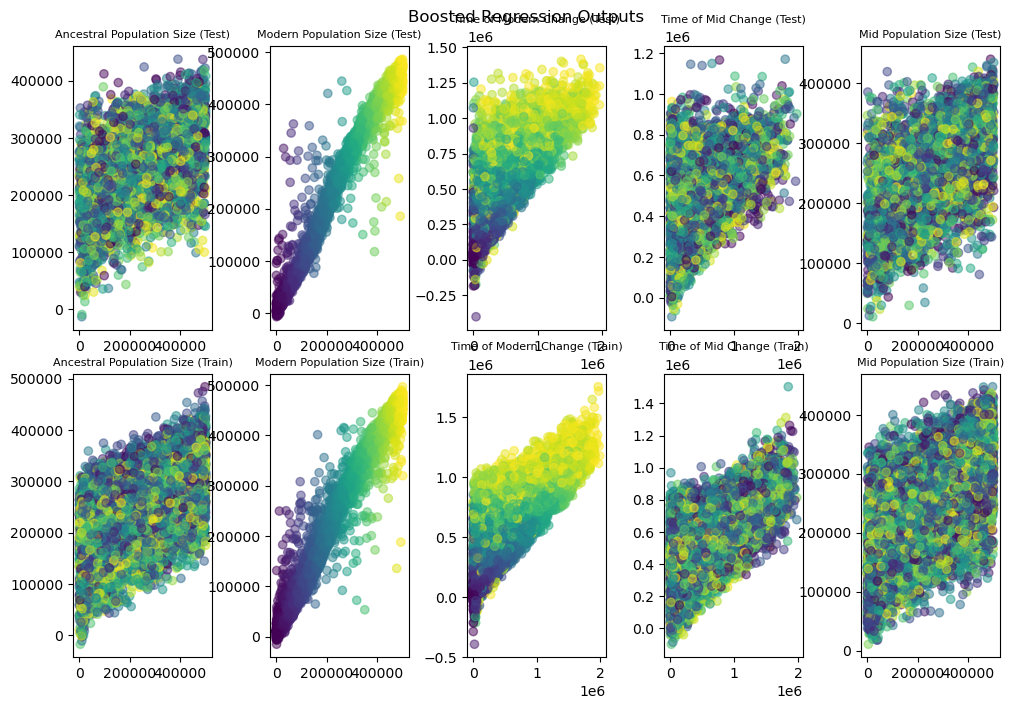

In [110]:
fig, axs = plt.subplots(2,5, figsize=(10,7))
fig.suptitle('Boosted Regression Outputs')
fig.tight_layout()
print('Training MSE t mod, t mid, ancestral size, mid size, modern size:', mean_squared_error(y3_train, bgb_train_preds, multioutput='raw_values'))
#rcx3_test_preds = rc_gb.predict(x3_test)
#rcx3_test_df = pd.DataFrame(rcx3_test_preds)
print( 'Test MSE t mod, t mid, ancestral size, mid size, modern size:', mean_squared_error(y3_test, bgb_test_preds, multioutput='raw_values'))
#Index(['t_mod', 't_mid', 'ancestral_size', 'mid_size', 'modern_size'], dtype='object')
axs[0,0].scatter(
    y3_test['ancestral_size']*250250,
    bgb_test_df[2]*250250,
    c=y3_test['modern_size'],
    alpha=0.5
)
axs[0,0].set_title('Ancestral Population Size (Test)',size = 8)
axs[0,1].scatter(
    y3_test['modern_size']*250250,
    bgb_test_df[4]*250250,
    c=y3_test['modern_size'],
    alpha=0.5
)
axs[0,1].set_title('Modern Population Size (Test)',size = 8)
axs[0,2].scatter(
    y3_test['mod_mid_change']*(2*250250),
    bgb_test_df[0]*(2*250250),
    c=y3_test['modern_size'],
    alpha=0.5
)
axs[0,2].set_title('Time of Modern Change (Test)',size = 8)        

axs[0,3].scatter(
    y3_test['mid_length']*(2*250250),
    bgb_test_df[1]*(2*250250),
    c=y3_test['modern_size'],
    alpha=0.5
)
axs[0,3].set_title('Time of Mid Change (Test)',size = 8)  

axs[0,4].scatter(
    y3_test['mid_size']*250250,
    bgb_test_df[3]*250250,
    c=y3_test['modern_size'],
    alpha=0.5
)
axs[0,4].set_title('Mid Population Size (Test)',size = 8)  


axs[1,0].scatter(
    y3_train['ancestral_size']*250250,
    bgb_train_df[2]*250250,
    c=y3_train['modern_size'],
    alpha=0.5
)
axs[1,0].set_title('Ancestral Population Size (Train)',size = 8)
axs[1,1].scatter(
    y3_train['modern_size']*250250,
    bgb_train_df[4]*250250,
    c=y3_train['modern_size'],
    alpha=0.5
)
axs[1,1].set_title('Modern Population Size (Train)',size = 8)
axs[1,2].scatter(
    y3_train['mod_mid_change']*(2*250250),
    bgb_train_df[0]*(2*250250),
    c=y3_train['modern_size'],
    alpha=0.5
)
axs[1,2].set_title('Time of Modern Change (Train)',size = 8)        

axs[1,3].scatter(
    y3_train['mid_length']*(2*250250),
    bgb_train_df[1]*(2*250250),
    c=y3_train['modern_size'],
    alpha=0.5
)
axs[1,3].set_title('Time of Mid Change (Train)',size = 8)  

axs[1,4].scatter(
    y3_train['mid_size']*250250,
    bgb_train_df[3]*250250,
    c=y3_train['modern_size'],
    alpha=0.5
)
axs[1,4].set_title('Mid Population Size (Train)',size = 8) 



